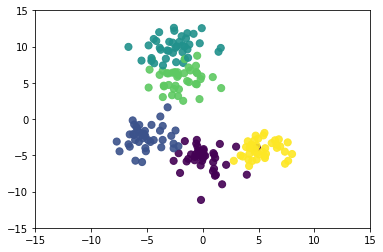

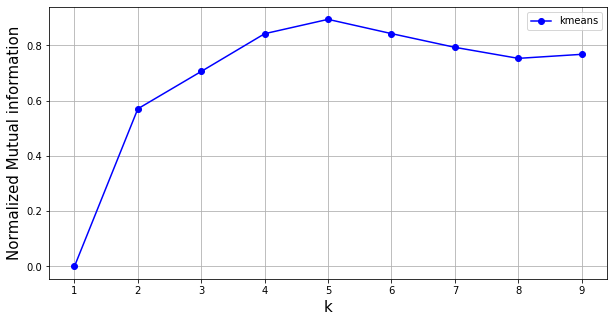

In [28]:
#EXERCÍCIO 1

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

# create blobs
k = 5
n=200
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)


NMI_km = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

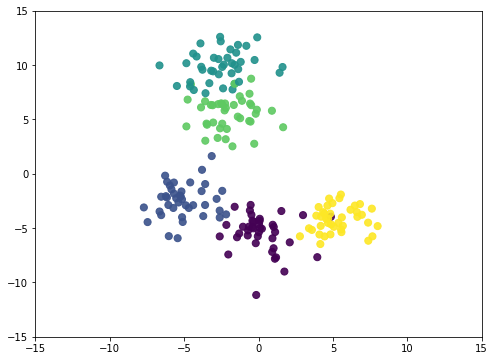

Silhouette score: 0.5155582821519661


In [29]:
#EXERCÍCIO 2

np.random.seed(10)

# create blobs
k = 5
n=200
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0]
labels = data[1]
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)

print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))

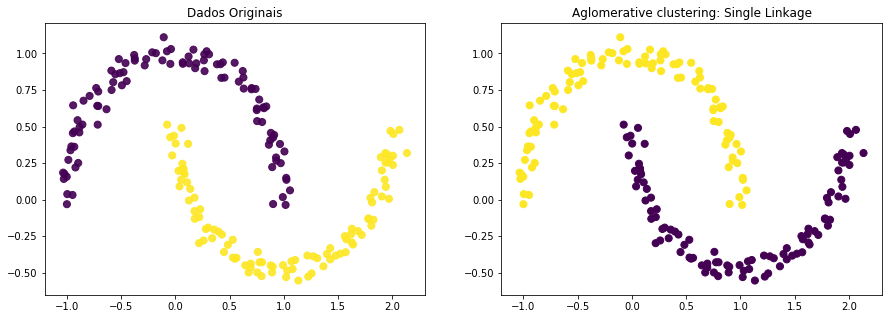

Mutual information score: 1.0


In [30]:
#EXERCÍCIO 3

from sklearn import cluster, datasets
from sklearn.cluster import KMeans
np.random.seed(10)

# create blobs
k = 2
n=200
#data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
data  = datasets.make_moons(n_samples=n, noise=.05)
X = data[0]
labels = data[1]

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.title('Dados Originais')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)

plt.title('Aglomerative clustering: Single Linkage')
plt.show(True)

print('Mutual information score:', normalized_mutual_info_score(y_hr, labels, average_method='arithmetic'))

In [31]:
#EXERCÍCIO 4
from scipy.spatial.distance import cdist
np.random.seed(10)

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

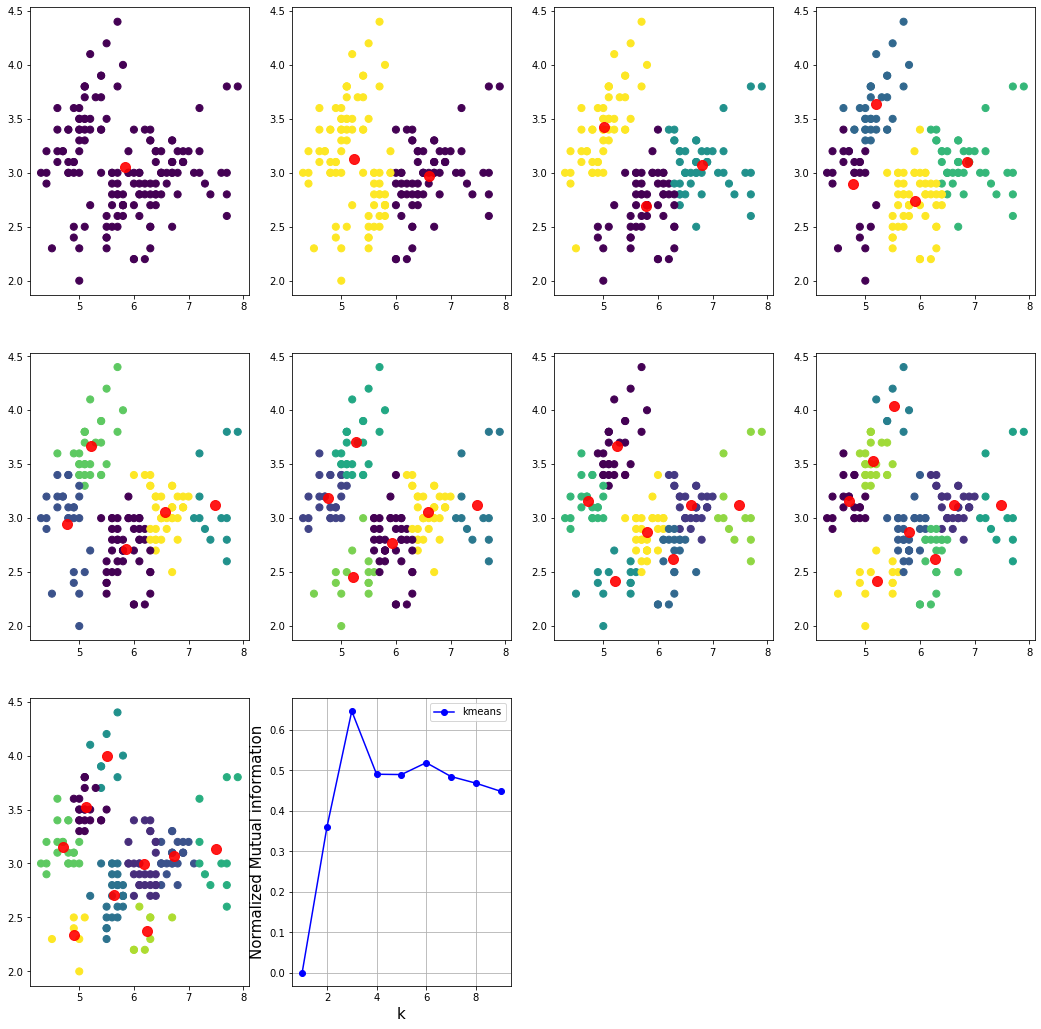

In [32]:
NMI_km2 = []
K = range(1,10)

plt.figure(figsize=(18,18))

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km2.append(normalized_mutual_info_score(y_km, y, average_method='arithmetic'))
    plt.subplot(3, 4, k)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

    
plt.subplot(3, 4, 10)
plt.plot(K, NMI_km2, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

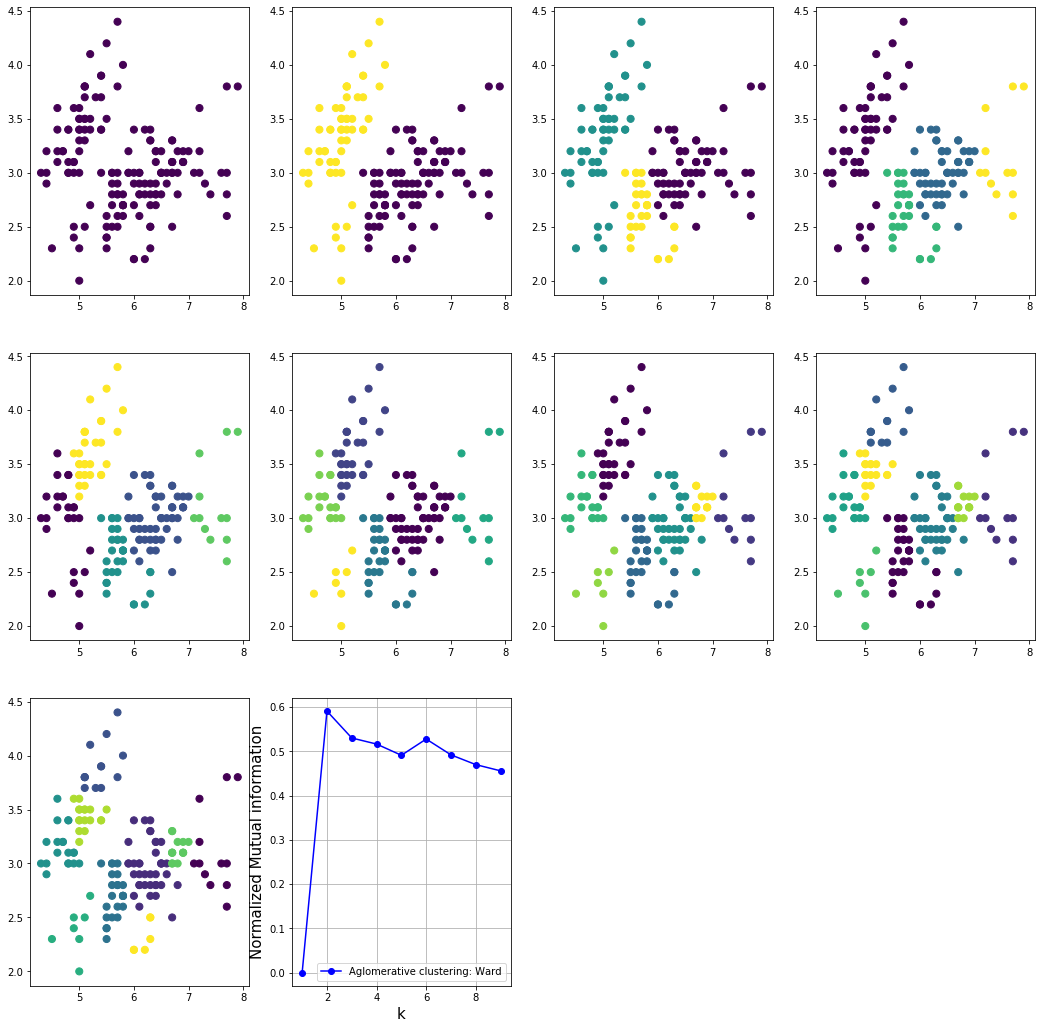

In [33]:
NMI_hr2 = []
K = range(1,10)

plt.figure(figsize=(18,18))

for k in K:
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr2.append(normalized_mutual_info_score(y_hr, y, average_method='arithmetic'))
    plt.subplot(3, 4, k)
    plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)

plt.subplot(3, 4, 10)
plt.plot(K, NMI_hr2, '-bo', label = 'Aglomerative clustering: Ward')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()